In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**If there were more people with a college degree in town T, how will it affect the result
for party P?
 Will the town S have the poll turnout above the state/region average?
 Which parties compete for the same voters?
 Which party changes the structure of its electorate the most from 2013 to 2017?****

In [2]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 923 kB/s 


In [3]:
df = pd.read_excel('../input/clean-data/clean_data.xlsx')

In [4]:
df.head()

,ID_N,municiality_code,municipality_name,District_name,Region,municipality_District_code,municipality_District,P1_17,P2_17,P3_17,...,edu_level_4,edu_level_3,edu_level_2,edulevel_1,Catholics,Employed,Retired_Working_part,Unemployed,Retired_not_working,Weight
0,35,529478,Čakov,Benešov,Středočeský kraj,5294781.0,529478_1,7.0,0.0,0.0,...,2.0,32.0,28.0,25.0,26.0,47.0,9.0,9.0,26.0,0.174210
1,38,529486,Čechtice,Benešov,Středočeský kraj,5294863.0,529486_3,6.0,0.0,0.0,...,1.0,8.0,21.0,12.0,6.0,18.0,6.0,0.0,16.0,0.084465
2,39,529486,Čechtice,Benešov,Středočeský kraj,5294864.0,529486_4,3.0,0.0,0.0,...,1.0,20.0,30.0,16.0,19.0,33.0,3.0,1.0,28.0,0.121419
3,41,529486,Čechtice,Benešov,Středočeský kraj,5294866.0,529486_6,1.0,0.0,0.0,...,3.0,23.0,35.0,15.0,18.0,47.0,1.0,2.0,26.0,0.149574
4,51,529621,Divišov,Benešov,Středočeský kraj,5296215.0,529621_5,1.0,0.0,0.0,...,1.0,20.0,30.0,30.0,12.0,42.0,7.0,6.0,24.0,0.172450


In [5]:
df.describe()

,ID_N,municiality_code,municipality_District_code,P1_17,P2_17,P3_17,P4_17,P5_17,P6_17,P7_17,...,edu_level_4,edu_level_3,edu_level_2,edulevel_1,Catholics,Employed,Retired_Working_part,Unemployed,Retired_not_working,Weight
count,14764.000000,14764.000000,1.366000e+04,14745.000000,14745.000000,14745.000000,14745.000000,14745.000000,14745.000000,14745.000000,...,14759.000000,14759.000000,14759.000000,14759.000000,14759.000000,14759.000000,14759.000000,14759.000000,14759.000000,14764.000000
mean,7402.191005,557082.907749,1.629125e+07,38.712784,0.591183,0.254459,24.932045,0.033232,0.260970,17.706205,...,16.727421,163.505251,199.250085,106.100481,73.099939,308.749306,41.096145,33.661359,156.082797,1.000000
std,4282.235585,26029.491325,2.058844e+07,36.244113,1.254770,0.626079,18.749332,0.245098,0.623066,19.295735,...,13.891996,123.199101,131.501793,75.416086,84.269350,222.524145,33.166357,27.802831,108.508273,0.716270
min,1.000000,500011.000000,5.000111e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,3691.750000,541231.000000,5.492582e+06,10.000000,0.000000,0.000000,9.000000,0.000000,0.000000,6.000000,...,4.000000,47.000000,82.000000,43.000000,20.000000,101.000000,14.000000,11.000000,56.000000,0.351939
50%,7397.500000,556904.000000,5.709312e+06,29.000000,0.000000,0.000000,22.000000,0.000000,0.000000,12.000000,...,14.000000,152.000000,186.000000,94.000000,49.000000,296.000000,35.000000,29.000000,142.000000,0.987190
75%,11115.250000,577308.000000,5.969736e+06,57.000000,1.000000,0.000000,37.000000,0.000000,0.000000,23.000000,...,27.000000,256.500000,292.000000,151.000000,94.000000,467.000000,60.000000,49.000000,239.000000,1.490463
max,14832.000000,599999.000000,5.998081e+07,431.000000,29.000000,7.000000,225.000000,10.000000,12.000000,359.000000,...,109.000000,962.000000,819.000000,719.000000,1072.000000,2156.000000,350.000000,695.000000,862.000000,16.187450


In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns
corr_df = df.corr(method='pearson')

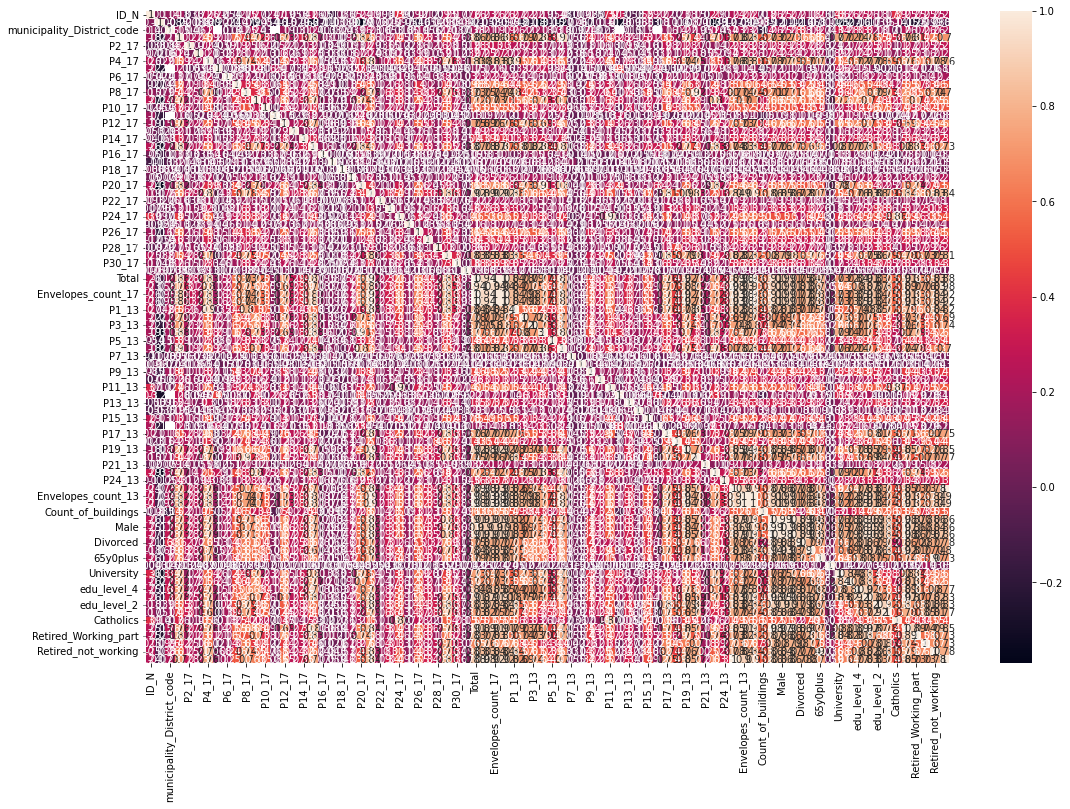

In [8]:
plt.figure(figsize=(18, 12))
sns.heatmap(corr_df, annot=True)
plt.show()

In [9]:
corr_df.style.background_gradient(cmap='coolwarm')

In [10]:
#1-How many rows has the dataframe?
df.shape[0]

14764

In [11]:
#2-How many columns has the dataframe?
df.shape[1]

88

In [12]:
#3-What is the percentage of non-null values in the Region column?
df['P1_17'].count()/df.shape[0]

0.9987130858845841

In [13]:
#4-How many text columns has the dataframe? 
(df.dtypes=='object').sum()

4

In [14]:
#5-Percentage of employed 
df['Employed'].sum()/(df['Employed'].sum() + df['Unemployed'].sum())

0.9016930176453047

In [15]:
#6-Percentage of retired working
df['Retired_Working_part'].sum()/(df['Retired_Working_part'].sum() + df['Retired_not_working'].sum())

0.20842055636727003

In [16]:
#df.groupby('Pclass').agg(pass_count=('PassengerId', 'count')) / df.shape[0]
df['P1_17'].value_counts(normalize=True).sort_index()

0.0      0.011936
1.0      0.021228
2.0      0.025229
3.0      0.026246
4.0      0.025975
           ...   
317.0    0.000068
330.0    0.000068
353.0    0.000068
413.0    0.000068
431.0    0.000068
Name: P1_17, Length: 224, dtype: float64

In [17]:
#most expensive ticket

df['P1_17'].sort_index()

0          7.0
1          6.0
2          3.0
3          1.0
4          1.0
         ...  
14759     11.0
14760     31.0
14761     43.0
14762    147.0
14763     48.0
Name: P1_17, Length: 14764, dtype: float64

In [18]:
df.sort_values('P1_17', ascending=False).head(1)

,ID_N,municiality_code,municipality_name,District_name,Region,municipality_District_code,municipality_District,P1_17,P2_17,P3_17,...,edu_level_4,edu_level_3,edu_level_2,edulevel_1,Catholics,Employed,Retired_Working_part,Unemployed,Retired_not_working,Weight
12805,1490,538442,Líbeznice,Praha-východ,Středočeský kraj,5384421.0,538442_1,431.0,0.0,0.0,...,38.0,494.0,465.0,244.0,120.0,1030.0,178.0,80.0,303.0,2.863027


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
plt.rcParams['figure.figsize'] = [8, 6]
sns.set_theme(style="ticks", color_codes=True)

In [21]:
df: pd.DataFrame(df)

In [22]:
data: pd.DataFrame = df.groupby('District_name').agg(P1_17=('P1_17', 'max'))

In [23]:
data.head(5)

,P1_17
District_name,
Benešov,129.0
Beroun,179.0
Blansko,143.0
Brno-město,182.0
Brno-venkov,295.0


In [24]:
data['P1_17'].describe()

count     77.000000
mean     149.675325
std       64.678444
min       65.000000
25%      112.000000
50%      131.000000
75%      159.000000
max      431.000000
Name: P1_17, dtype: float64

In [25]:
data.count()

P1_17    77
dtype: int64

In [26]:
df[df['P1_17'].isna()]

,ID_N,municiality_code,municipality_name,District_name,Region,municipality_District_code,municipality_District,P1_17,P2_17,P3_17,...,edu_level_4,edu_level_3,edu_level_2,edulevel_1,Catholics,Employed,Retired_Working_part,Unemployed,Retired_not_working,Weight
9535,2347,545317,Záboří,České Budějovice,Jihočeský kraj,5453172.0,545317_2,NaN,NaN,NaN,...,1.0,19.0,51.0,23.0,17.0,61.0,13.0,7.0,30.0,0.193567
9536,4685,560286,Sokolov,Sokolov,Karlovarský kraj,56028620.0,560286_20,NaN,NaN,NaN,...,44.0,386.0,495.0,342.0,37.0,811.0,81.0,72.0,321.0,2.588514
9537,4686,560286,Sokolov,Sokolov,Karlovarský kraj,56028621.0,560286_21,NaN,NaN,NaN,...,27.0,378.0,418.0,244.0,30.0,725.0,59.0,74.0,156.0,2.035969
9538,9518,582646,Velké Opatovice,Blansko,Jihomoravský kraj,5826467.0,582646_7,NaN,NaN,NaN,...,2.0,22.0,37.0,29.0,20.0,35.0,8.0,5.0,38.0,0.168931
9539,11209,589560,Hvozd,Prostějov,Olomoucký kraj,5895604.0,589560_4,NaN,NaN,NaN,...,1.0,14.0,42.0,30.0,32.0,49.0,4.0,6.0,31.0,0.186528
9540,12885,598917,Karviná,Karviná,Moravskoslezský kraj,59891762.0,598917_62,NaN,NaN,NaN,...,10.0,113.0,130.0,72.0,95.0,167.0,16.0,24.0,132.0,0.612374
9541,13640,554286,Mariánské Hory a Hulváky,Ostrava-město,Moravskoslezský kraj,55428610.0,554821_5010,NaN,NaN,NaN,...,12.0,124.0,178.0,80.0,37.0,247.0,29.0,41.0,132.0,0.820019
9542,13641,554286,Mariánské Hory a Hulváky,Ostrava-město,Moravskoslezský kraj,55428611.0,554821_5011,NaN,NaN,NaN,...,7.0,43.0,116.0,79.0,29.0,88.0,14.0,15.0,139.0,0.462800
9543,13643,554286,Mariánské Hory a Hulváky,Ostrava-město,Moravskoslezský kraj,55428613.0,554821_5013,NaN,NaN,NaN,...,5.0,99.0,175.0,184.0,97.0,137.0,8.0,49.0,258.0,0.712677
9544,13644,554286,Mariánské Hory a Hulváky,Ostrava-město,Moravskoslezský kraj,55428614.0,554821_5014,NaN,NaN,NaN,...,21.0,154.0,177.0,103.0,62.0,268.0,26.0,42.0,175.0,1.052299


In [27]:
df[df['P1_17']==5]

,ID_N,municiality_code,municipality_name,District_name,Region,municipality_District_code,municipality_District,P1_17,P2_17,P3_17,...,edu_level_4,edu_level_3,edu_level_2,edulevel_1,Catholics,Employed,Retired_Working_part,Unemployed,Retired_not_working,Weight
8,79,530026,Kuňovice,Benešov,Středočeský kraj,5300261.0,530026_1,5.0,0.0,0.0,...,2.0,16.0,25.0,11.0,49.0,39.0,6.0,1.0,21.0,0.107342
32,529,533114,Zlonice,Kladno,Středočeský kraj,5331145.0,533114_5,5.0,0.0,0.0,...,1.0,13.0,44.0,26.0,7.0,49.0,5.0,5.0,24.0,0.186528
38,604,533211,Břežany I,Kolín,Středočeský kraj,5332112.0,533211_2,5.0,0.0,0.0,...,2.0,20.0,39.0,24.0,2.0,52.0,10.0,9.0,18.0,0.156613
40,640,533441,Krakovany,Kolín,Středočeský kraj,5334412.0,533441_2,5.0,0.0,0.0,...,0.0,12.0,35.0,23.0,13.0,26.0,3.0,6.0,29.0,0.128458
46,732,530964,Bludov,Kutná Hora,Středočeský kraj,5309641.0,530964_1,5.0,0.0,0.0,...,0.0,4.0,14.0,2.0,7.0,14.0,0.0,0.0,8.0,0.052791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14138,5384,566951,Výškov,Louny,Ústecký kraj,5669511.0,566951_1,5.0,0.0,0.0,...,5.0,64.0,137.0,84.0,11.0,154.0,25.0,28.0,73.0,0.513831
14199,5692,502081,Ústí nad Labem,Ústí nad Labem,Ústecký kraj,50208110.0,554804_2010,5.0,0.0,0.0,...,2.0,31.0,66.0,111.0,3.0,74.0,13.0,50.0,56.0,1.453510
14200,5698,502081,Ústí nad Labem,Ústí nad Labem,Ústecký kraj,50208116.0,554804_2016,5.0,1.0,0.0,...,16.0,148.0,324.0,375.0,31.0,434.0,35.0,154.0,146.0,1.164919
14697,13382,545911,Moravská Ostrava a Přívoz,Ostrava-město,Moravskoslezský kraj,54591113.0,554821_8013,5.0,0.0,2.0,...,2.0,74.0,213.0,247.0,23.0,232.0,19.0,144.0,107.0,1.142043


In [28]:
data.head()

,P1_17
District_name,
Benešov,129.0
Beroun,179.0
Blansko,143.0
Brno-město,182.0
Brno-venkov,295.0


<AxesSubplot:xlabel='P1_17', ylabel='Count'>

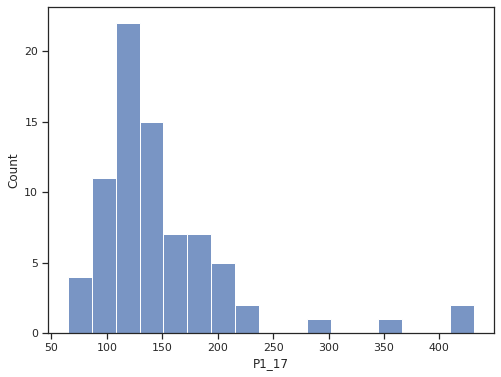

In [29]:
sns.histplot(data=data, x='P1_17')

In [30]:
data[data['P1_17']>26]

,P1_17
District_name,
Benešov,129.0
Beroun,179.0
Blansko,143.0
Brno-město,182.0
Brno-venkov,295.0
...,...
Česká Lípa,96.0
České Budějovice,215.0
Český Krumlov,128.0


In [31]:
data['P1_17'].value_counts().iloc[:10]

129.0    4
121.0    4
112.0    3
191.0    2
128.0    2
131.0    2
123.0    2
94.0     2
96.0     2
82.0     2
Name: P1_17, dtype: int64

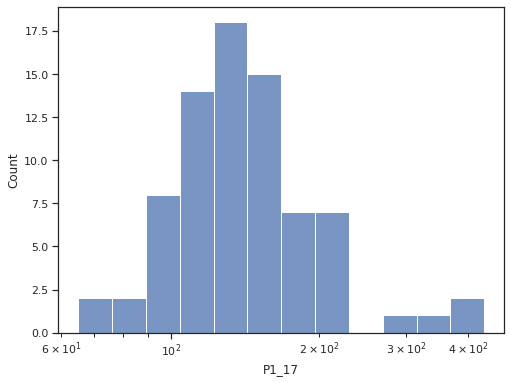

In [32]:
subset = data[data['P1_17'] > 0]
sns.histplot(data=subset, x='P1_17', log_scale=(10, False));

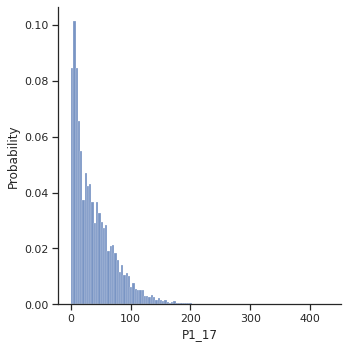

In [33]:
sns.displot(data=df, x='P1_17', stat="probability", common_norm=False);

In [34]:
data.head()

,P1_17
District_name,
Benešov,129.0
Beroun,179.0
Blansko,143.0
Brno-město,182.0
Brno-venkov,295.0


<AxesSubplot:xlabel='District_name', ylabel='P1_17'>

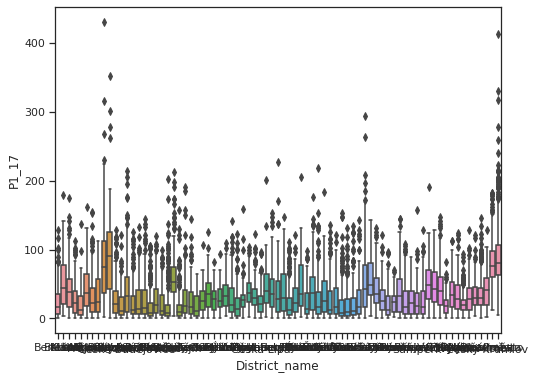

In [35]:
sns.boxplot(data=df, x='District_name',y='P1_17')

<AxesSubplot:xlabel='District_name', ylabel='P1_17'>

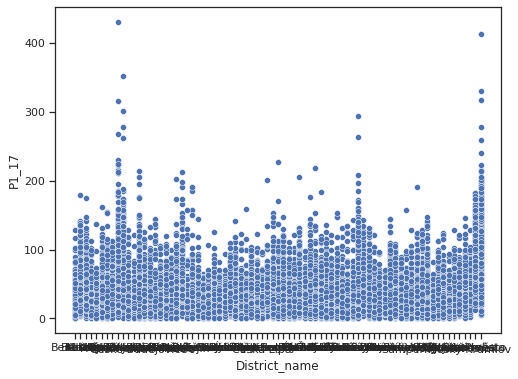

In [36]:
sns.scatterplot(data=df, x='District_name', y='P1_17')

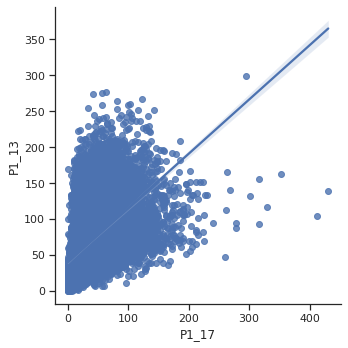

In [37]:
sns.lmplot(data=df, x='P1_17', y='P1_13')

In [38]:
df.head()

,ID_N,municiality_code,municipality_name,District_name,Region,municipality_District_code,municipality_District,P1_17,P2_17,P3_17,...,edu_level_4,edu_level_3,edu_level_2,edulevel_1,Catholics,Employed,Retired_Working_part,Unemployed,Retired_not_working,Weight
0,35,529478,Čakov,Benešov,Středočeský kraj,5294781.0,529478_1,7.0,0.0,0.0,...,2.0,32.0,28.0,25.0,26.0,47.0,9.0,9.0,26.0,0.174210
1,38,529486,Čechtice,Benešov,Středočeský kraj,5294863.0,529486_3,6.0,0.0,0.0,...,1.0,8.0,21.0,12.0,6.0,18.0,6.0,0.0,16.0,0.084465
2,39,529486,Čechtice,Benešov,Středočeský kraj,5294864.0,529486_4,3.0,0.0,0.0,...,1.0,20.0,30.0,16.0,19.0,33.0,3.0,1.0,28.0,0.121419
3,41,529486,Čechtice,Benešov,Středočeský kraj,5294866.0,529486_6,1.0,0.0,0.0,...,3.0,23.0,35.0,15.0,18.0,47.0,1.0,2.0,26.0,0.149574
4,51,529621,Divišov,Benešov,Středočeský kraj,5296215.0,529621_5,1.0,0.0,0.0,...,1.0,20.0,30.0,30.0,12.0,42.0,7.0,6.0,24.0,0.172450


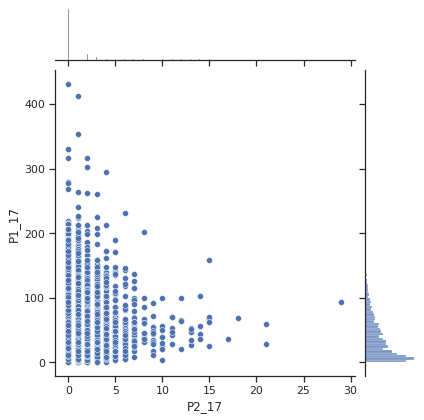

In [39]:
sns.jointplot(data=df, x='P2_17', y='P1_17')

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# default figure size is small, let's make it a bit bigger
plt.rcParams['figure.figsize'] = [8, 6]

# change the default plot style https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles
sns.set_theme(style="darkgrid", color_codes=True)

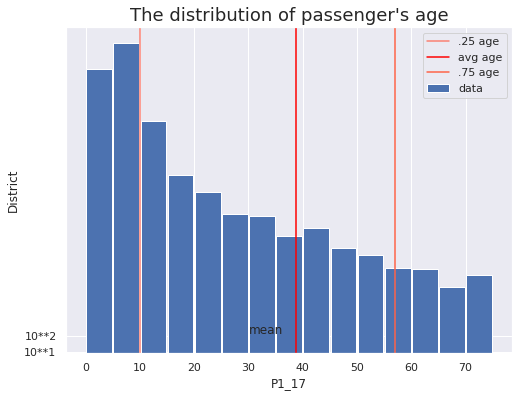

In [41]:

fig, ax = plt.subplots()

ax.hist(df['P1_17'], label='data', rwidth=.95, bins=np.arange(0, 80, 5))
ax.set(
    xlabel='P1_17',  # ax.set_xlabel()
    ylabel='District'  # ax.set_ylabel()
)

ax.set_title("The distribution of passenger's age", fontsize=18)

ax.axvline(df['P1_17'].quantile(.25), c='salmon', label='.25 age')
ax.axvline(df['P1_17'].mean(), c='red', label='avg age')
ax.axvline(df['P1_17'].quantile(.75), c='tomato', label='.75 age')
ax.legend()


ax.set_yticks([10, 100])
ax.set_yticklabels(['10**1', '10**2'])

ax.annotate('mean', (30, 110))
pass
# we can export figure to file
# fig.savefig('simple.png')

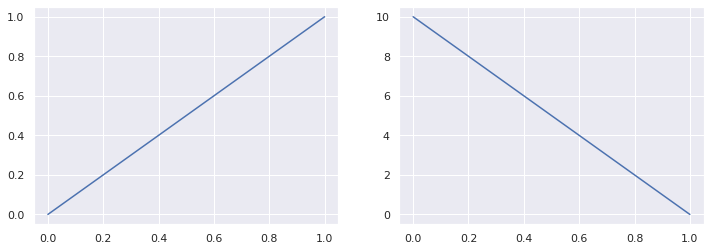

In [42]:

# combination of plots
fig, ax = plt.subplots(1 ,2, figsize=(12, 4))

ax[0].plot([0, 1], [0, 1], label='plot1')
ax[1].plot([0, 1], [10, 0], label='plot2')

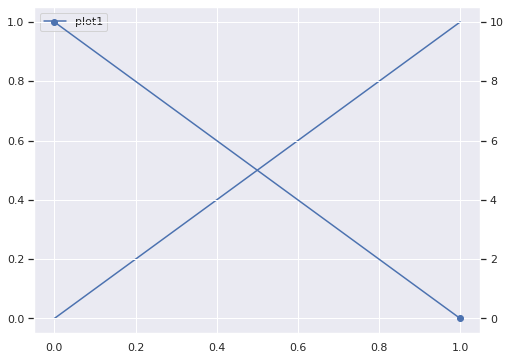

In [43]:

# secondary axis
fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.plot([0, 1], [0, 1], label='plot1')
ax2.plot([0, 1], [10, 0], label='plot2', marker='o')

ax.legend()

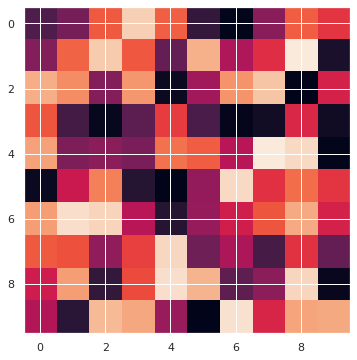

In [44]:

# showing images or heatmaps
plt.imshow(np.random.rand(10, 10))